In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [18]:
from mppi import Parsers as P
import matplotlib.pyplot as plt

# Tutorial for the YamboParser class

This tutorial describes the usage of the YamboParser class that parse the o- file(s) produced by a yambo computation.

The class is designed to deal with the list of files produced as the output key of the run method of YamboCalculator.

Here we present some example:

In [3]:
qp_output = ['YamboParser_test/qp_results/o-qp_test1.qp']

In [4]:
qp_output_extendOut = ['YamboCalculator_test/qp_test_ExtendOut/o-qp_test_ExtendOut.qp']

In [5]:
rt_output = ['YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.carriers',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.spin_magnetization',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.external_field',
        'YamboParser_test/rt_results/o-NETime_1000-dephase_0.01-freq_1.55-pol_circular.polarization']

When the list of files is passed to the parser the extendOut option used to run the computation has to be provided,
otherwise the parser could perform a wrong assignement of the names of the variables. 

In [32]:
P.YamboParser?

Init signature: P.YamboParser(files, verbose=False, extendOut=True)
Docstring:      Class that performs the parsing of a Yambo o- file(s).
Init docstring:
Initialize the data member of the class.

Args:
    files(:py:class:`list`): The list of strings with the names of the file to be parsed.
    verbose (:py:class:`boolean`) : Determine the amount of information provided on terminal.
    extendOut (:py:class:`boolean`) : Determine which dictionary is used as reference for the
                    names of the variables
File:           ~/Applications/MPPI/mppi/Parsers/YamboParser.py
Type:           type
Subclasses:     


In [6]:
results = P.YamboParser(files=qp_output,extendOut=False)

results is a dictionary with the structure

In [7]:
results

{'qp': {'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
  'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
  'e0': array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
          2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
         -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
          1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00]),
  'eme0': array([-1.50691 ,  0.7861  ,  0.7914  ,  0.7771  ,  1.884047,  1.907533,
          1.906476,  2.349819, -1.21027 ,  0.216875,  0.676644,  0.653277,
          1.799721,  2.065016,  2.084261,  2.726886]),
  'sce0': array([ 4.48108 ,  2.194   ,  2.201   ,  2.184061, -2.137494, -2.110904,
         -2.112035, -2.203245,  4.52994 ,  2.934759,  2.263484,  2.236098,
         -2.186759, -2.20382 , -2.182057, -2.267519])}}

For several usages it can be useful to access to the results with the object.attribute sintax. 
In this case it is possible to use the AttributeDict class the perform this conversion

In [8]:
from mppi import Utilities as U

In [9]:
obj = U.AttributeDict(**results)

and we can access as

In [10]:
obj.qp.e0

array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
        2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152071e+00,
       -1.110872e+01, -3.914389e+00, -7.552550e-01, -7.552460e-01,
        1.962407e+00,  3.490390e+00,  3.490396e+00,  6.757975e+00])

Test of a parsing with extendOut = True

In [11]:
results = P.YamboParser(files=qp_output_extendOut,extendOut=True)

now all the variables are available, for instance

In [12]:
results['qp']['z_Re']

array([0.7587, 0.8448, 0.8449, 0.8443, 0.8378, 0.8386, 0.8387, 0.8421,
       0.8305, 0.8306, 0.8149, 0.8152, 0.7562, 0.828 , 0.8421, 0.8417,
       0.8403, 0.836 , 0.8367, 0.8331, 0.8293, 0.8282, 0.8112, 0.8115])

Let's see a further example by parsing the typical files of a real-time computation

In [13]:
results = P.YamboParser(rt_output)

In this case we have several files, so the dictionary has more than one key

In [14]:
results.keys()

dict_keys(['carriers', 'spin_magnetization', 'external_field', 'polarization'])

We can easily perform some plots

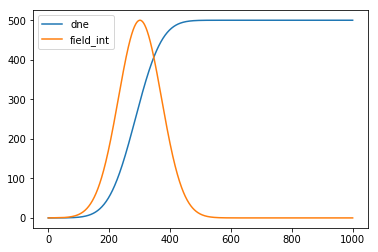

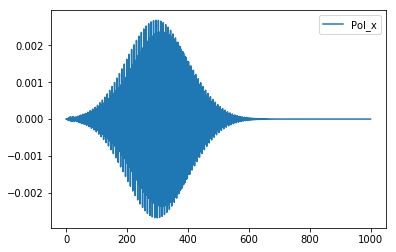

In [16]:
time = results['carriers']['time']
elec = results['carriers']['dne']
field_int = results['external_field']['Intensity']
pol = results['polarization']['Pol_x']

ratio = max(field_int)/max(elec)

plt.plot(time,ratio*elec,label='dne')
plt.plot(time,field_int,label='field_int')
plt.legend()
plt.show()

plt.plot(time,pol,label='Pol_x')
plt.legend()

Again we can access to the results using the attribute syntax. For instance if we are intersted to the spin_magnetization
part of the resutls we can set

In [17]:
spin_results = U.AttributeDict(**results['spin_magnetization'])

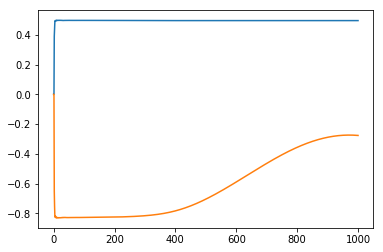

In [18]:
plt.plot(spin_results.time,spin_results.Mc_z)
plt.plot(spin_results.time,spin_results.Mv_z)

## Parsing of a ypp computation

We test the functionality of the Parser to deal with the output of a ypp -s b computation for plotting the bands structure along a path

In [19]:
bands_output = ['YamboCalculator_test/bands_test1/o-bands_test1.bands_interpolated']

In [20]:
results = P.YamboParser(bands_output)

For instance

In [21]:
results['bands_interpolated']['col0'] # kpath

array([0.        , 0.02296918, 0.04593835, 0.06890753, 0.09187671,
       0.11484589, 0.13781506, 0.16078424, 0.18375342, 0.2067226 ,
       0.22969177, 0.25266095, 0.27563013, 0.2985993 , 0.32156848,
       0.34453766, 0.36750684, 0.39047601, 0.41344519, 0.43641437,
       0.45938355, 0.48235272, 0.5053219 , 0.52829108, 0.55088434,
       0.57347759, 0.59607085, 0.61866411, 0.64125737, 0.66385063,
       0.68644389, 0.70903715, 0.73163041, 0.75422367, 0.77681692,
       0.79941018, 0.82200344, 0.8445967 , 0.86718996, 0.88978322,
       0.91237648, 0.93496974, 0.957563  , 0.98015626, 1.00274951,
       1.02534277, 1.04793603, 1.07052929, 1.09312255, 1.11571581,
       1.13830907, 1.1617713 , 1.18523353, 1.20869576, 1.23215799,
       1.25562022, 1.27908245, 1.30254468, 1.32600691, 1.34946914,
       1.37293137, 1.3963936 , 1.41985583, 1.44331806, 1.46605209,
       1.48878612, 1.51152015, 1.53425418, 1.5569882 , 1.57972223,
       1.60245626, 1.62519029, 1.64792432, 1.67065835, 1.69339

In [22]:
results['bands_interpolated']['col1'] # energies of the first band included in the computation

array([-6.92244006e+00, -6.89456750e+00, -6.80905005e+00, -6.66256275e+00,
       -6.45506597e+00, -6.19239804e+00, -5.88499915e+00, -5.54470821e+00,
       -5.18230107e+00, -4.80669380e+00, -4.42520939e+00, -4.04376626e+00,
       -3.66578563e+00, -3.28979422e+00, -2.90838764e+00, -2.51212605e+00,
       -2.09766393e+00, -1.67347735e+00, -1.25737543e+00, -8.68891659e-01,
       -5.25931945e-01, -2.49064080e-01, -6.50615745e-02, -3.77496810e-06,
       -6.29556139e-02, -2.36496842e-01, -4.82668963e-01, -7.58747799e-01,
       -1.03304555e+00, -1.29174174e+00, -1.53792606e+00, -1.78627954e+00,
       -2.05464117e+00, -2.35405922e+00, -2.68236701e+00, -3.02622904e+00,
       -3.37018860e+00, -3.70516988e+00, -4.03055233e+00, -4.35110015e+00,
       -4.67381504e+00, -5.00667217e+00, -5.35699357e+00, -5.72799830e+00,
       -6.11577549e+00, -6.50923119e+00, -6.89170878e+00, -7.24099965e+00,
       -7.52809606e+00, -7.71962799e+00, -7.78724231e+00, -7.76161105e+00,
       -7.69613277e+00, -

The parser cannot determine the names of the columns because the number of colums depend on the
number of bands considered. The meaning of the columns can be identified by knowing the input used to 
perform the post processing. 

In [23]:
r = results['bands_interpolated']
kpath = r['col0']
band3 = r['col1']
band4 = r['col2']
band5 = r['col3']
band6 = r['col4']

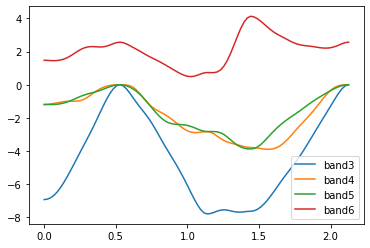

In [24]:
plt.plot(kpath,band3,label='band3')
plt.plot(kpath,band4,label='band4')
plt.plot(kpath,band5,label='band5')
plt.plot(kpath,band6,label='band6')
plt.legend()

Build a nice band plot

In [25]:
G = [0.,0.,0.]
X = [1.,0.,0.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
fcc_high_sym = {'X':X,'L':L,'G':G,'W':W}

In [26]:
band_range = [3,6]

In [27]:
data = results['bands_interpolated']
#data

In [28]:
len(band_range)

2

In [29]:
def get_kp_coord_path(data,band_range):
    """
    Return a list with the coordinates of the kpoints
    ordered along the path. The coordinates are expressed in the same
    units provided by the output of the ypp computation.
    """
    num_bands = band_range[1]-band_range[0]+1
    index_first_col = 1 + num_bands
    len_kpath = len(data['col1'])
    kp_coord = []
    for ind in range(len_kpath):
        kp_coord.append([data['col'+str(index_first_col)][ind] for i in [0,1,2]])
    return kp_coord

In [31]:
#get_kp_coord_path(data,band_range)

...to be completed....